# Clasificación No Convecional
## Práctica 0
Carlos Checa Moreno

# Ejercicio 2
Contenido del dataset: Resumen: Datos experimentales utilizados para la clasificación binaria (ocupación de la habitación) de temperatura, humedad, luz y CO2. La ocupación real se obtuvo a partir de imágenes con marca de tiempo que se tomaron cada minuto.
El ejercicio consiste obtener un modelo de clasificación para clasificar en si está ocupada (clase positiva) o no lo está, usando SVM y optimizando con  rejilla (GridSearchCV) los hiperparámetros C y kernel.
El dataset está en formato de texto, pero se puede cargar como archivo csv, y contiene un conjunto de entrenamiento (datatraining.txt) dos conjuntos de test (datatest.txt y datatest2.txt) aunque vamos a usar solo el primero (datatest.txt). Contiene 6 atributos y la clase. Como el primero es la fecha y hora habría que eliminarlo. Los atributos son: fecha, temperatura, humedad, iluminación, CO2, ratio de humedad y etiqueta/clase
*   URL: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#
*   URL Dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip

**Tomando como base el ejemplo6 de los suministrados en clase (apartado de rejilla con SVC)** implementar un clasificador basado en el SVM No lineal (SVC)  que contenga los siguientes apartados:
*   Uso de StandardScaler en el preprocesamiento para escalar los datos.
*   Una vez escalados los datos, definir la rejilla con los siguientes parámetros: 'C':[0.01,0.1,1, 2], 'kernel': ["linear", "poly", "rbf", "sigmoid"]
*   Entrenar el modelo y mostrar los mejores parámetros.
*   Para los mejores parámetros obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Implementar un clasificador basado en un árbol de decisión, a partir de los datos ya preprocesados para el clasificador anterior, usando una rejilla con los siguientes parámetros: 'max_leaf_nodes': list(range(3, 30)), 'min_samples_split': [2, 3, 4, 5, 6] y obtenerPara los mejores parámetros obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.


In [1]:
import pandas as pd

In [2]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
unzip occupancy_data.zip

Archive:  occupancy_data.zip
  inflating: datatest.txt            
  inflating: datatest2.txt           
  inflating: datatraining.txt        


--2025-01-21 19:09:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘occupancy_data.zip’

     0K .......... .......... .......... .......... ..........  836K
    50K .......... .......... .......... .......... ..........  957K
   100K .......... .......... .......... .......... .......... 1.84M
   150K .......... .......... .......... .......... .......... 1.83M
   200K .......... .......... .......... .......... ..........  961K
   250K .......... .......... .......... .......... ..........  956K
   300K .......... .......... .......                          1.05M=0.3s

2025-01-21 19:09:03 (1.08 MB/s) - ‘occupancy_data.zip’ saved [335713]



In [3]:
occupancy_train = pd.read_csv("/content/datatraining.txt")

In [4]:
occupancy_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [5]:
occupancy_test = pd.read_csv("/content/datatest.txt")

In [6]:
occupancy_test.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [ ]:
#Como nos suministran los datos separados en test y entrenamiento, no hay que hacer partición del dataset en test y entrenamiento, como en el ejercicio 1
#Ahora habría la fecha de los conjuntos test y entrenamiento.
#Después habría que separar en los conjuntos de entrenamiento y test, los datos de las etiquetas/clases
#Para estas dos acciones, ver el código suministrado del ejercicio 1.
#Así se obtendrán los conjuntos X_train, X_test, y_train, y_test

In [ ]:
#Una vez obtenidos los conjuntos de test y de entrenamiento, hay que aplicar el escalado con StandarScaler (no vamos a usar pipe).
#Para aplicarlo por ejemplo en X_train --> X_train = StandardScaler().fit_transform(X_train)

In [13]:
# Separar en características (X) y etiquetas/clases (y)
X_train = occupancy_train.drop(columns=['Occupancy', 'date']) # Drop 'date' column
y_train = occupancy_train['Occupancy']
X_test = occupancy_test.drop(columns=['Occupancy', 'date'])  # Drop 'date' column
y_test = occupancy_test['Occupancy']

In [14]:
from sklearn.preprocessing import StandardScaler
# Escalar los datos
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().transform(X_test)

## SVM

In [15]:
param_grid_svm = {
    'C': [0.01, 0.1, 1, 2],
    'kernel': ["linear", "poly", "rbf", "sigmoid"]
}

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm = SVC()
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [18]:
# Mejores parámetros
print("Mejores parámetros para SVM:", grid_search_svm.best_params_)

Mejores parámetros para SVM: {'C': 2, 'kernel': 'linear'}


In [19]:
# SVM con los mejores parámetros
y_pred_svm = grid_search_svm.predict(X_test)

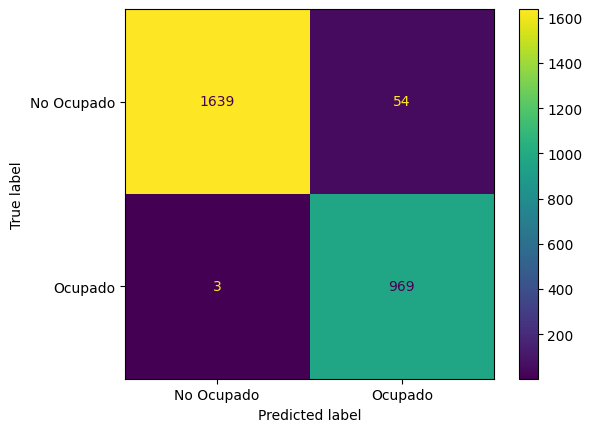

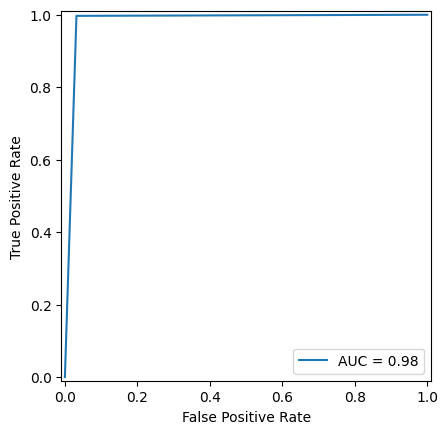

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import roc_curve, auc
# Matriz de confusión y métricas
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["No Ocupado", "Ocupado"])
disp_svm.plot()

# Curva ROC para SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
RocCurveDisplay(fpr=fpr_svm, tpr=tpr_svm, roc_auc=auc(fpr_svm, tpr_svm)).plot()

In [25]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"Accuracy: {accuracy_svm}")
print(f"Precisión: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1-Score: {f1_svm}")

Accuracy: 0.9786116322701689
Precisión: 0.9472140762463344
Recall: 0.9969135802469136
F1-Score: 0.9714285714285714


## Árbol de decisión

In [26]:
param_grid_tree = {
    'max_leaf_nodes': list(range(3, 30)),
    'min_samples_split': [2, 3, 4, 5, 6]
}

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5)
grid_search_tree.fit(X_train, y_train)

# Mejores parámetros
print("Mejores parámetros para Árbol de Decisión:", grid_search_tree.best_params_)

Mejores parámetros para Árbol de Decisión: {'max_leaf_nodes': 3, 'min_samples_split': 2}


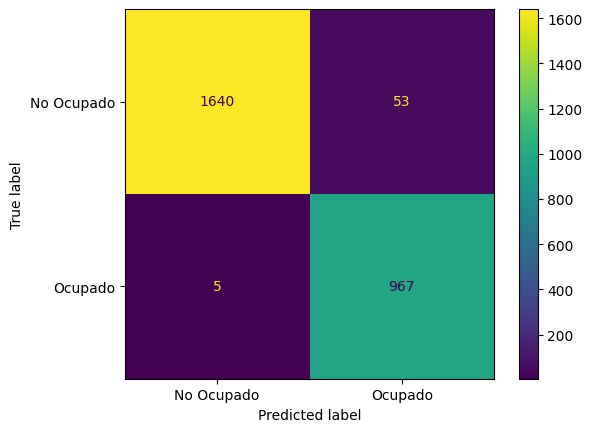

In [30]:
# Evaluar el modelo Árbol de Decisión con los mejores parámetros
y_pred_tree = grid_search_tree.predict(X_test)

# Matriz de confusión y métricas
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=["No Ocupado", "Ocupado"])
disp_tree.plot()

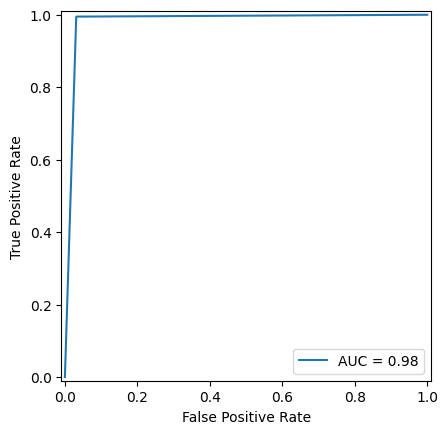

In [31]:
# Curva ROC para Árbol de Decisión
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_tree)
RocCurveDisplay(fpr=fpr_tree, tpr=tpr_tree, roc_auc=auc(fpr_tree, tpr_tree)).plot()

In [33]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print(f"Accuracy: {accuracy_tree}")
print(f"Precisión: {precision_tree}")
print(f"Recall: {recall_tree}")
print(f"F1-Score: {f1_tree}")

Accuracy: 0.9782363977485928
Precisión: 0.9480392156862745
Recall: 0.9948559670781894
F1-Score: 0.9708835341365462


## Párrafo explicativo

En este ejercicio primero he tenido que crear las variables para guardar los conjuntos de entrenamiento y test a partir de los csv ya diferenciados. Como procesamiento se ha realizado un escalado, pero sin usar una pipeline como en los anteriores ejercicios.

Después se ha buscado la mejor combinación de parámetros para el SVM y el árbol de decisión mediante GridSearchCV que se encarga de comparar las diferentes combinaciones. Para la mejor configuración se han obtenido las métricas para evaluar el modelo al igual que en el ejercicio 1.

En cuanto a los resultados obtenidos para los mejores parámetros de los modelos:

*   Con un accuracy de 0.9786 para el modelo **SVC**, podemos observar que este clasifica correctamente la mayoría de las instancias, tanto de la clase positiva como de la negativa. La precisión, con un valor de 0.9472, indica que el modelo realiza muy buenas predicciones para la clase positiva, aunque algunas instancias clasificadas como "ocupado" no lo son realmente. Por su parte, el recall, que alcanza 0.9969, demuestra que el modelo detecta casi todas las instancias de la clase positiva. El F1-Score de 0.9714, al ser alto, confirma el equilibrio entre precisión y recall, lo que refuerza la fiabilidad del modelo.

*   En el caso del modelo basado en árboles de decisión tenemos unos resultados muy similares ya que ambos modelos han resuelto el problema de forma bastante sobresaliente.
